#Self Organizing Map

# Un-Supervised Learning:



*   Fraud detection using Self Organizing Map (SOM)
*   in dataset 0 represents files which are not approved and 1 represents files which are approved

*   Here our goal is to find potential fraud rather than predicting 0 or 1






##Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values # here we are keeping customerID as we need ID to trace back to fraud customer
y = dataset.iloc[:, -1].values

In [4]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


*  X and y: These parameters determine the dimensions of the SOM grid. In this case, you are creating a 10x10 grid, meaning there are 10 rows and 10 columns of nodes in the SOM.

*  input_len: This parameter specifies the dimensionality of the input data. Each input data point is expected to have 15 features.

*  sigma: Sigma is the radius of influence of each node during training. A larger sigma means a broader influence, and a smaller sigma means a more localized influence.

*  learning_rate: This parameter controls the rate at which the SOM learns from the input data. A higher learning rate means faster learning, while a lower rate means slower and more stable learning.







In [53]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len=15, sigma=1.0, learning_rate=0.5)

# randomly initializing weights and training data over 100 iterations
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

##Visualizing the results


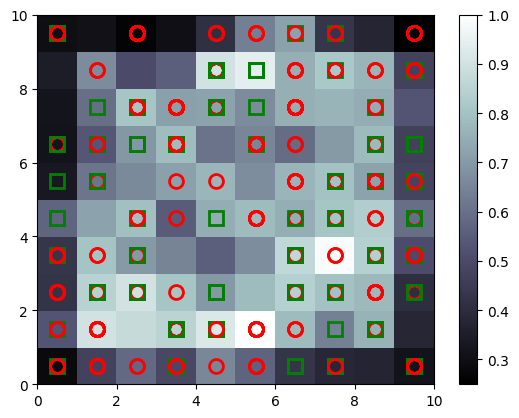

In [54]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] # to show which are arroved and which not. circle red- not approved, green square- approved
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)  # this gives us winning node for customer at point x
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

# NOTE: each time you run SOM it might give different output then before so you have to change below code section based on output

## Finding the frauds


### using a trained Self-Organizing Map (SOM) to find and concatenate data points that are associated with specific grid nodes. Let's break down what each line is doing:

* mappings = som.win_map(X): This line maps or associates the input data X to the nodes on the SOM grid. The resulting mappings variable is a dictionary where the keys are coordinates of the grid nodes (e.g., (5, 1)) and the values are lists of data points from X that map to those nodes.

* frauds = np.concatenate((mappings[(5, 1)], mappings[(7, 3)]), axis=0): Here, you are concatenating the data points that map to two specific grid nodes, (5, 1) and (7, 3). You use the np.concatenate function to combine these data points along axis=0, which means they will be stacked vertically to form a single array.

In [56]:
mappings = som.win_map(X)
# so here we are taking data points which are highlighted strongly representing outlier(potential fraud customer)
frauds = np.concatenate((mappings[(5,1)], mappings[(7,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [57]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15745375
15638983
15654625
15623210
15570508
15641733
15660144
15802869
15750545
15641007
15572390
15586174
